## 1. Imports Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
import pickle
import os
from sklearn.impute import SimpleImputer

In [112]:
# Set random seed

np.random.seed(42)

## 2. Load the Data

In [113]:
# Load the dataset

data_path = '../data/data.csv'
df = pd.read_csv(data_path)

In [114]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 3. Data Exploration and Preprocessing

In [115]:
print("\n Missing values in the dataset")
print(df.isnull().sum())


 Missing values in the dataset
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

In [116]:
print("\nData Types")
print(df.dtypes)

print("\nBasic Statistics")
print(df.describe())


Data Types
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavit

In [117]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [118]:
print("\nClass distribution:")
print(df['diagnosis'].value_counts())
print(df['diagnosis'].value_counts(normalize=True) * 100)


Class distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64
diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64


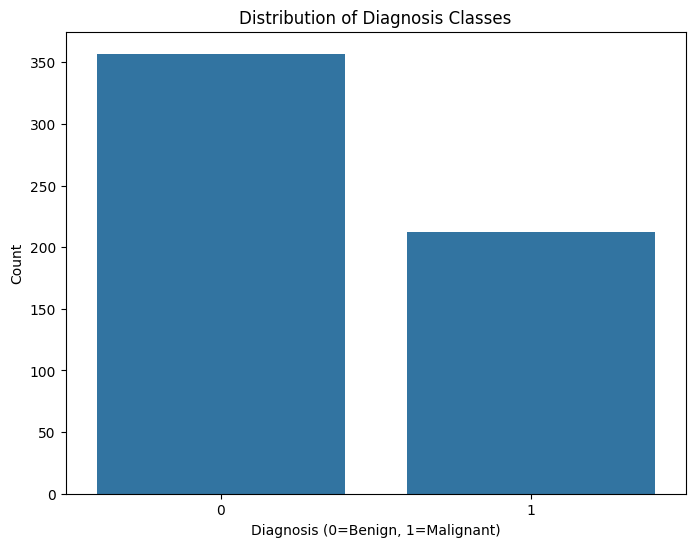

In [119]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis Classes')
plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')
plt.ylabel('Count')
plt.show()

In [120]:
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

## Exploratory Data Analysis

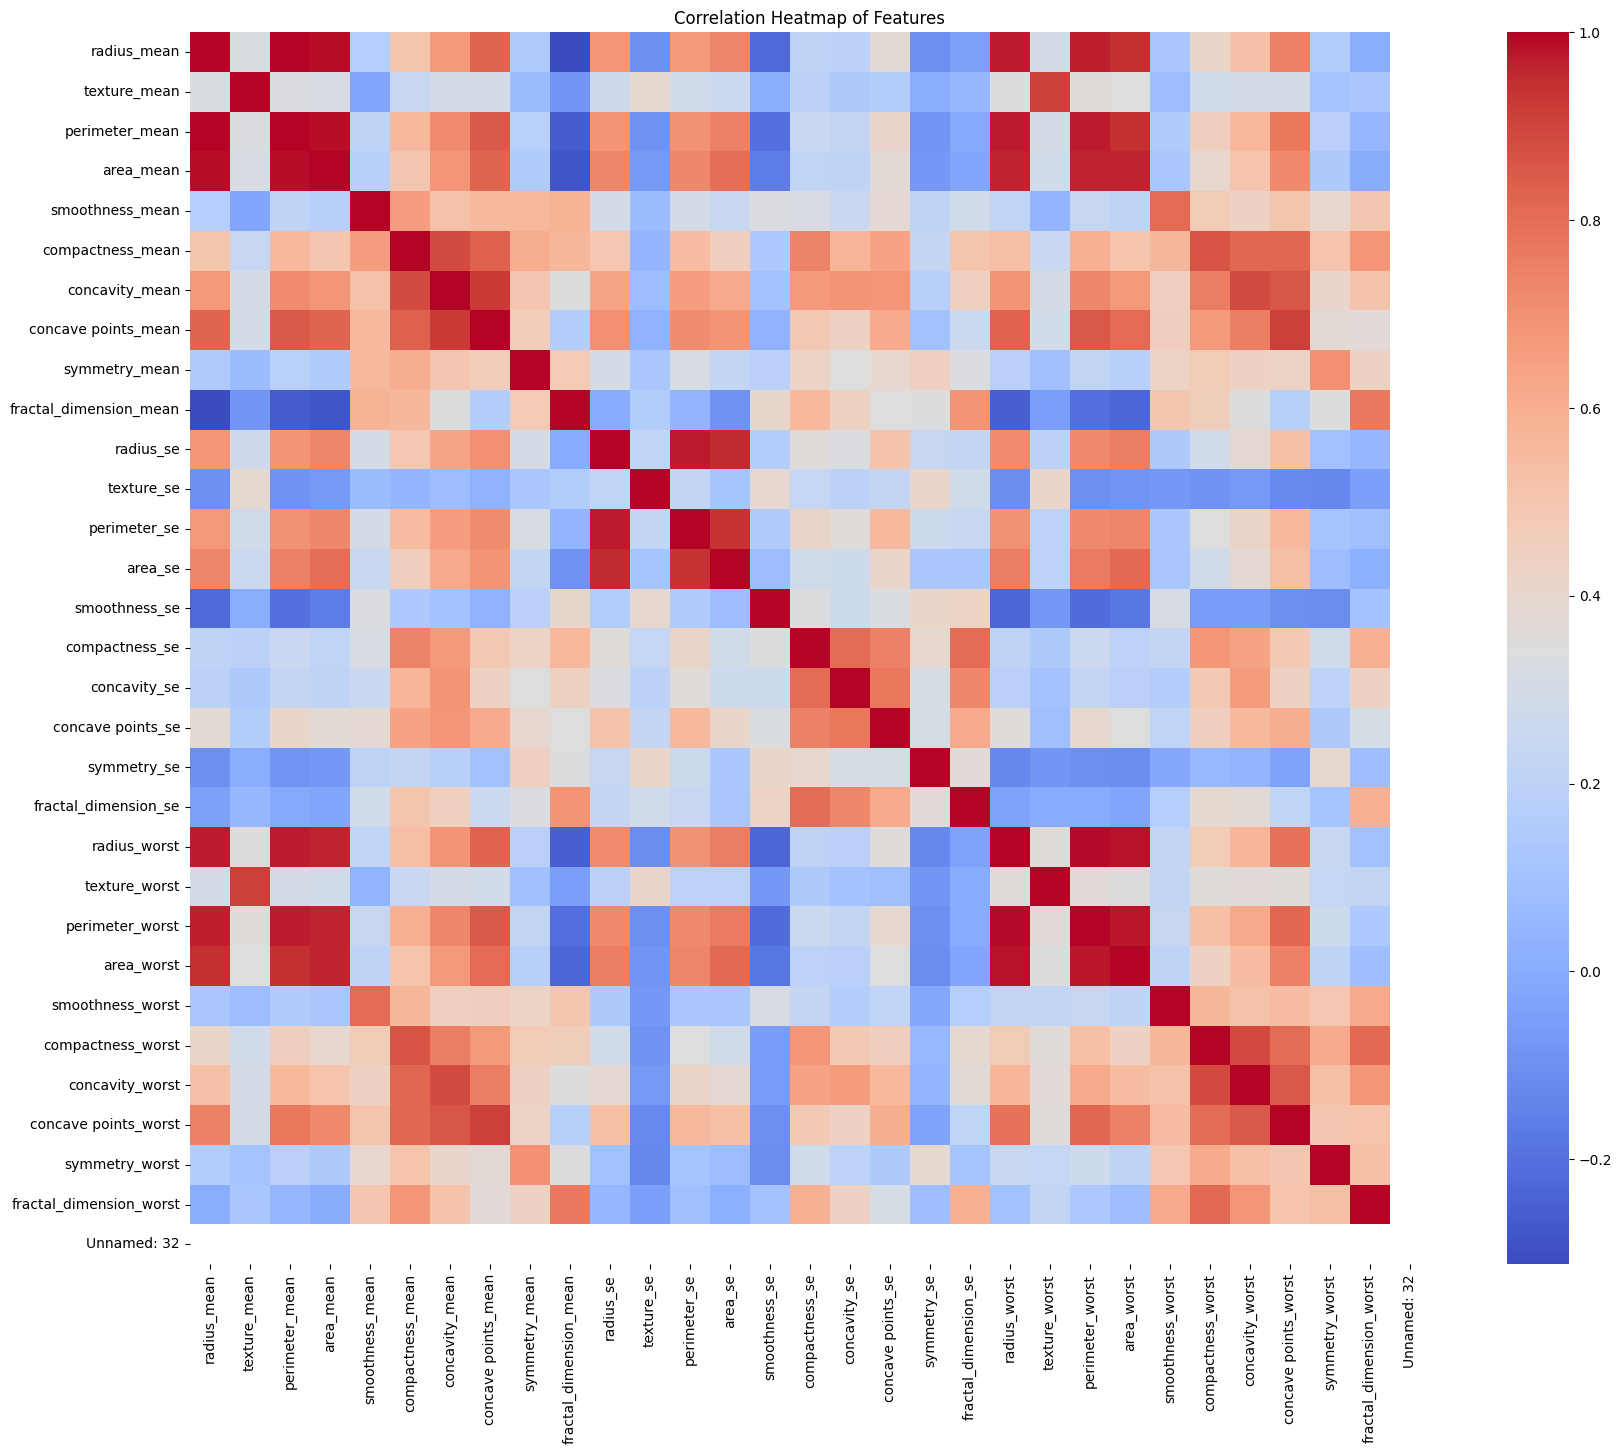

In [121]:
# Correlation heatmap

plt.figure(figsize=(20, 16))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

In [122]:
# Display top correlated features

print("\nTop correlated features:")
corr_with_target = pd.DataFrame(abs(correlation_matrix.iloc[:, 0]).sort_values(ascending=False))
print(corr_with_target.head(10))


Top correlated features:
                      radius_mean
radius_mean              1.000000
perimeter_mean           0.997855
area_mean                0.987357
radius_worst             0.969539
perimeter_worst          0.965137
area_worst               0.941082
concave points_mean      0.822529
concave points_worst     0.744214
area_se                  0.735864
radius_se                0.679090


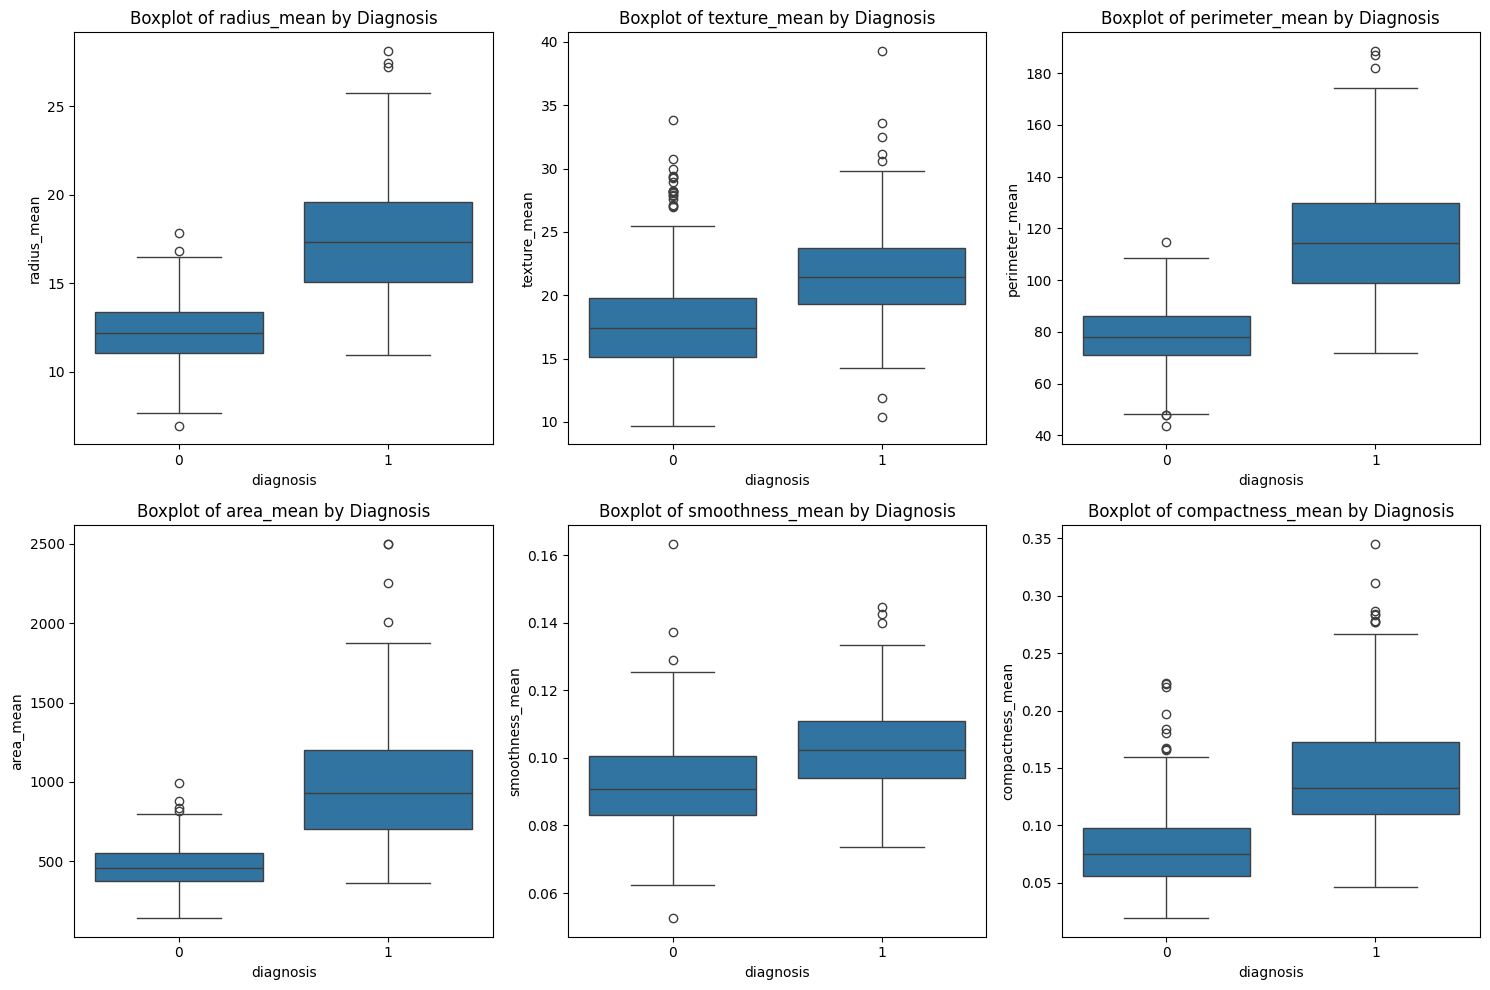

In [123]:
# Boxplots for feature distributions by diagnosis
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns[:6]):  # Plot first 6 features
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df['diagnosis'], y=df[column])
    plt.title(f'Boxplot of {column} by Diagnosis')
plt.tight_layout()
plt.show()

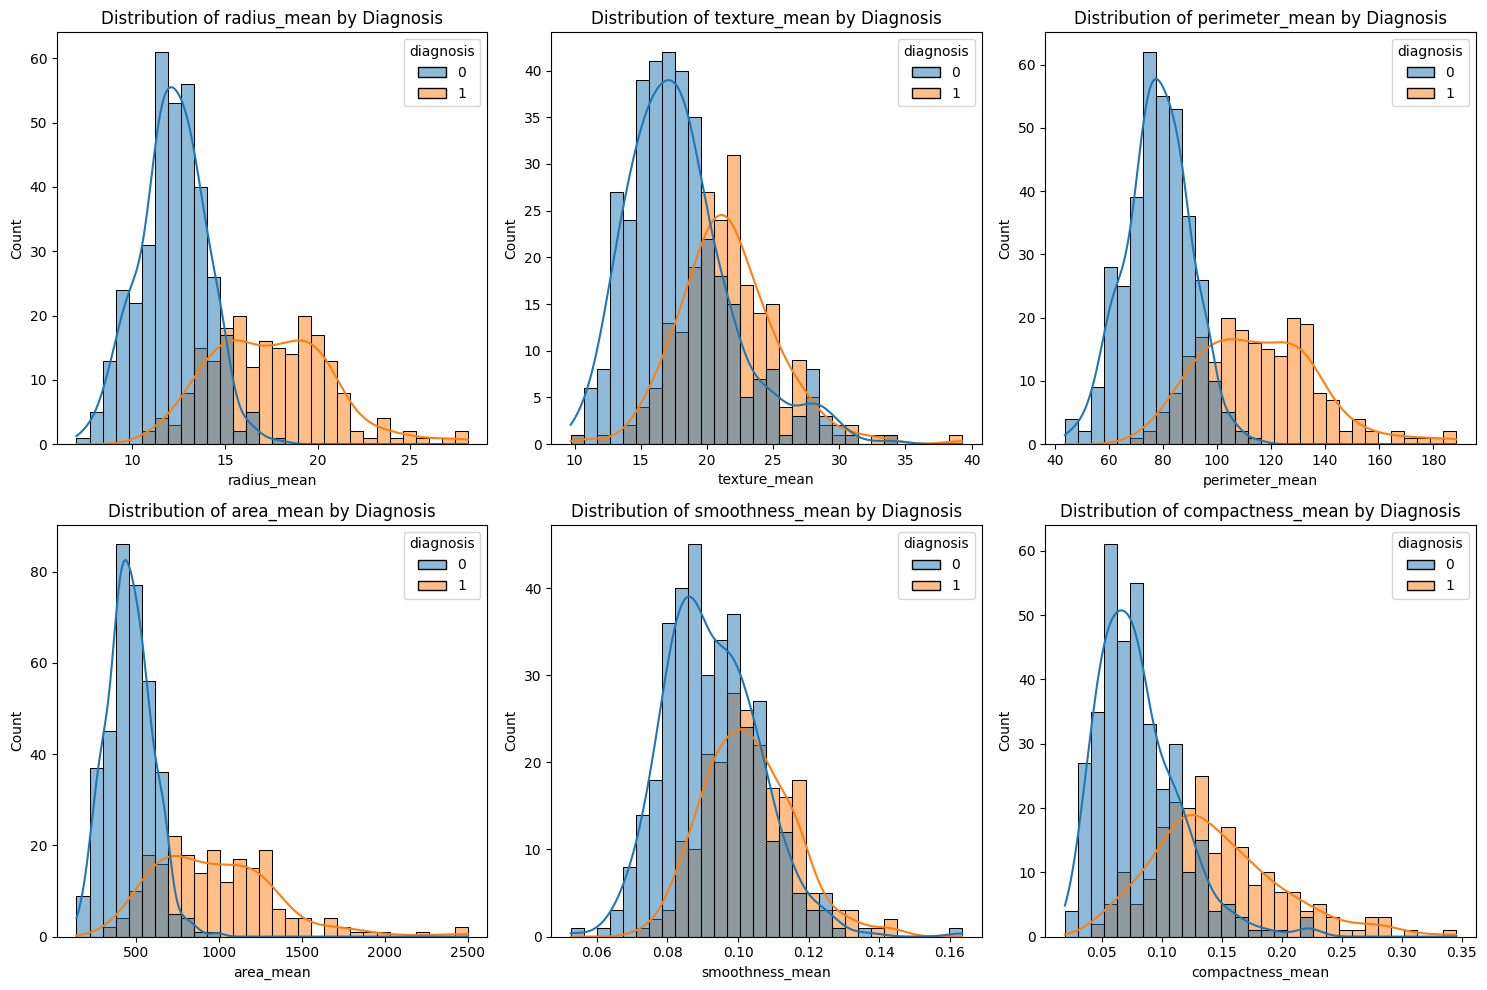

In [124]:
# Feature distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns[:6]):  # Plot first 6 features
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=column, hue='diagnosis', kde=True, bins=30)
    plt.title(f'Distribution of {column} by Diagnosis')
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

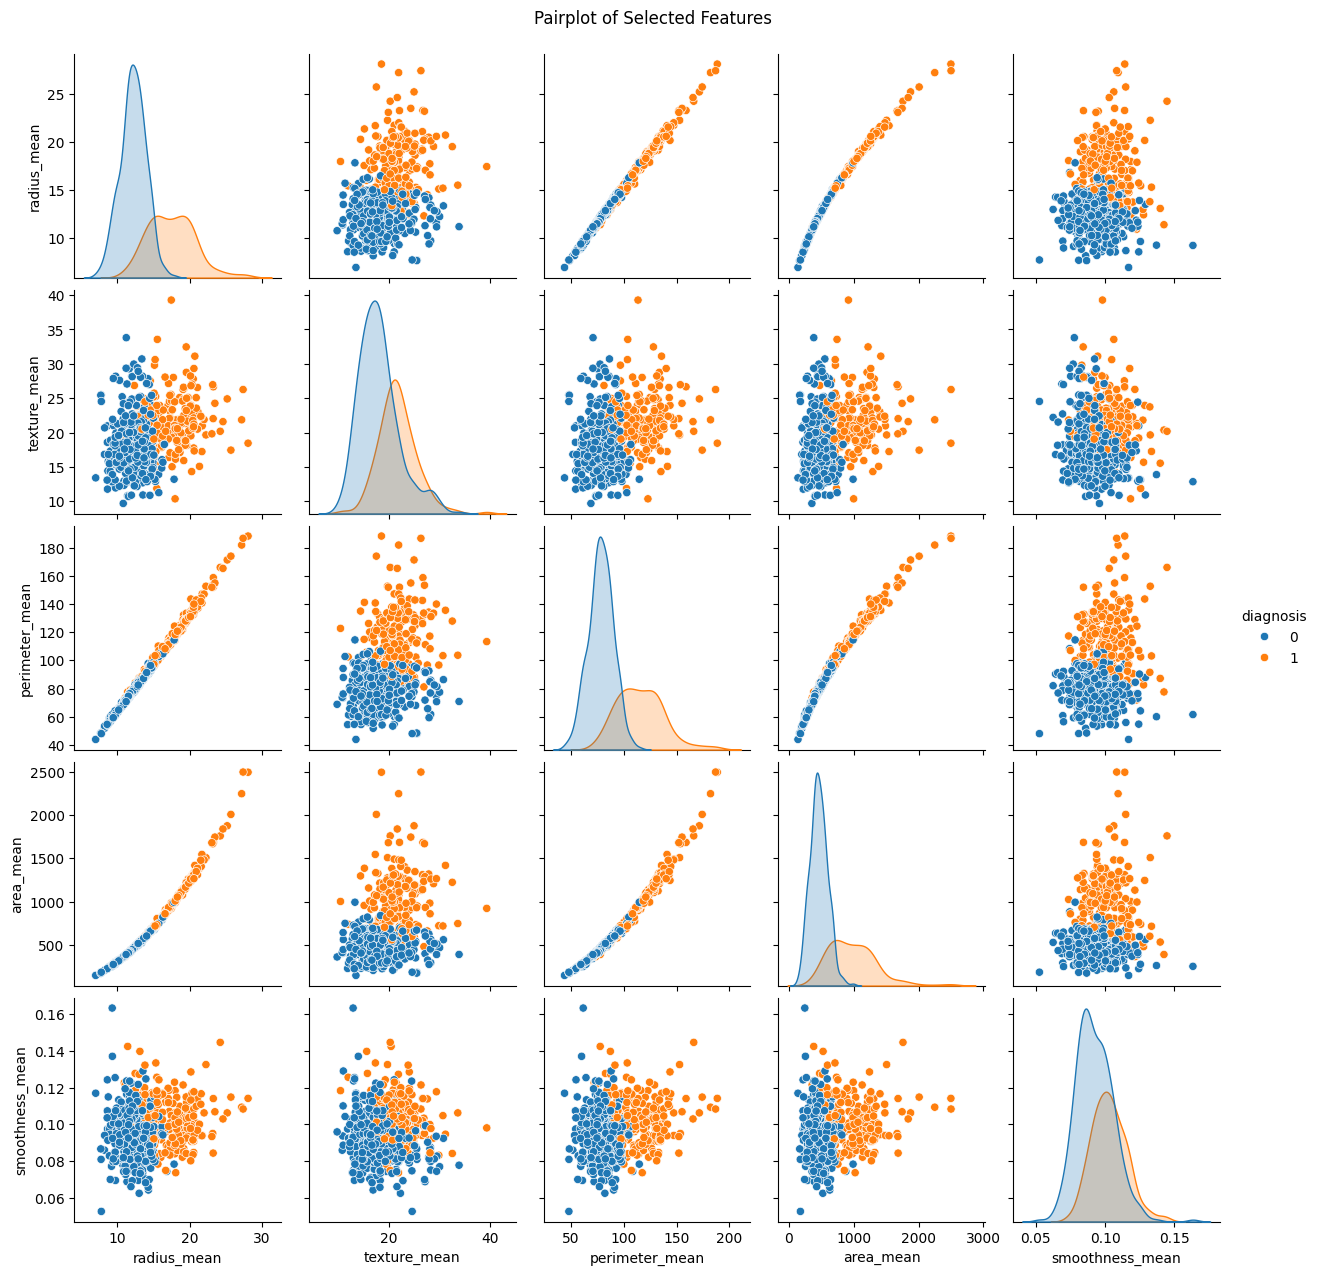

In [125]:
# Pairplot of select features

selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
plt.figure(figsize=(12, 10))
sns.pairplot(df[selected_features], hue='diagnosis', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

## 5. Data Preprocssing

In [126]:
# Drop the 'Unnamed: 32' column as it contains NaN values
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

# Check for any remaining NaN values
print("\nChecking for NaN values:")
print(X.isnull().sum().sum())

# If there are still NaN values, handle them
X = X.fillna(X.mean())

# Verify no NaN values remain
print("\nVerifying no NaN values remain:")
print(X.isnull().sum().sum())

y = df['diagnosis']


Checking for NaN values:
0

Verifying no NaN values remain:
0


In [127]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (455, 30)
Testing set shape: (114, 30)


## 6. Model Development with Hyperparameter Tuning

In [128]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

In [129]:
# Define hyperparameters to tune
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}

In [130]:
# Create the grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    error_score='raise',
    verbose=1,
    n_jobs=-1
)

In [131]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define parameter grid
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'newton-cg']
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    error_score='raise',
    verbose=1,
    n_jobs=1
)

# Train the model
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best cross-validation score: 0.9758241758241759


## 7. Model Evaluation

In [132]:
# Get the best model from grid search

best_model = grid_search.best_estimator_

In [133]:
# Make predictions on the test set

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [134]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



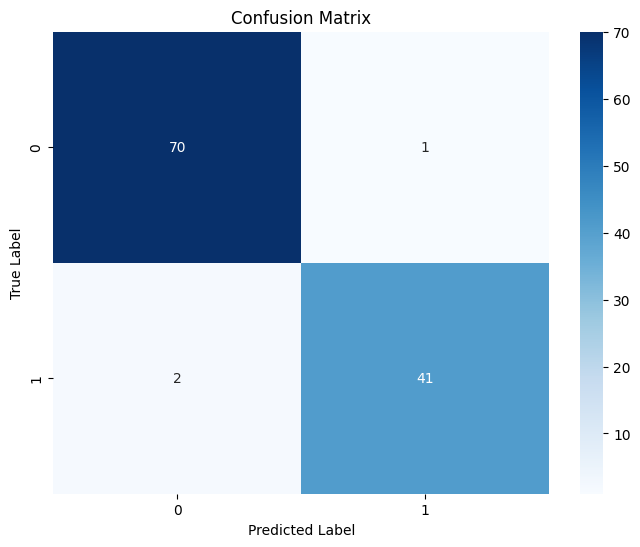

In [135]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

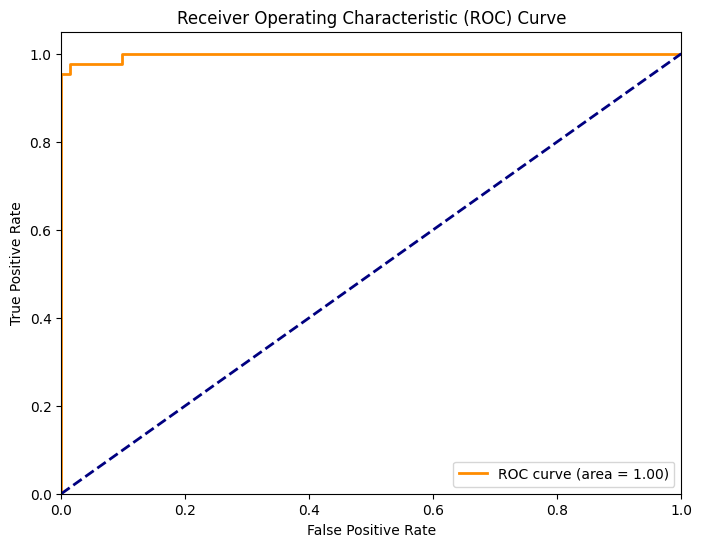

In [136]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 8. Feature Importance Analysis

In [137]:
# Extract logistic regression coefficients
coefficients = best_model.named_steps['classifier'].coef_[0]
feature_names = X.columns

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

In [138]:
# Sort by absolute coefficient value
feature_importance['AbsCoef'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('AbsCoef', ascending=False)

print("\nFeature Importance:")
print(feature_importance.head(10))


Feature Importance:
                 Feature  Coefficient   AbsCoef
21         texture_worst     1.350606  1.350606
10             radius_se     1.268178  1.268178
28        symmetry_worst     1.208200  1.208200
7    concave points_mean     1.119804  1.119804
26       concavity_worst     0.943053  0.943053
13               area_se     0.907186  0.907186
20          radius_worst     0.879840  0.879840
23            area_worst     0.841846  0.841846
6         concavity_mean     0.801458  0.801458
27  concave points_worst     0.778217  0.778217


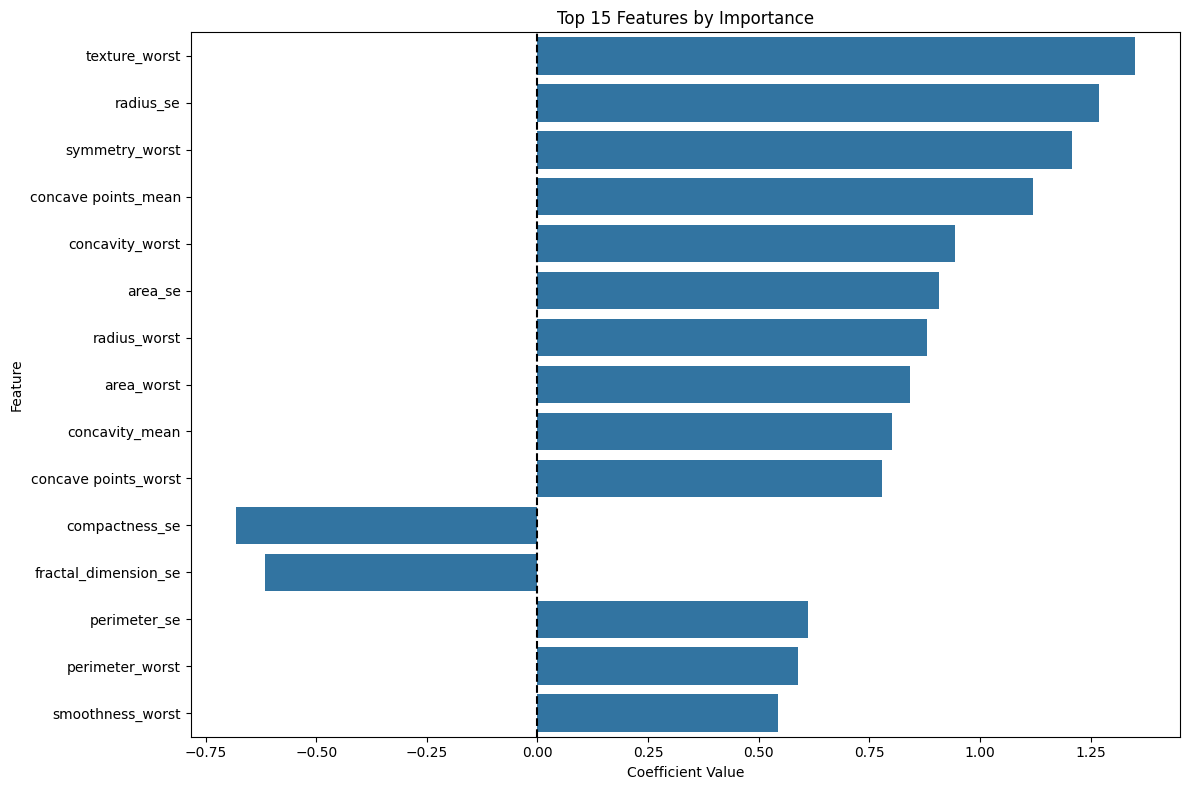

In [139]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Features by Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

## 9. Save the Model to Disk

In [140]:
# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

In [141]:
# Save the trained model with pickle
with open('../models/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [142]:
print("\nModel saved to '../models/logistic_regression_model.pkl'")# Save the trained model with pickle
with open('../models/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("\nModel saved to '../models/logistic_regression_model.pkl'")

# Save model metadata (features, performance metrics, etc.)
model_metadata = {
    'features': list(X.columns),
    'performance': {
        'accuracy': best_model.score(X_test, y_test),
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'auc': roc_auc
    },
    'best_parameters': best_model.get_params()
}

with open('../models/model_metadata.pkl', 'wb') as f:
    pickle.dump(model_metadata, f)

print("Model metadata saved to '../models/model_metadata.pkl'")



Model saved to '../models/logistic_regression_model.pkl'

Model saved to '../models/logistic_regression_model.pkl'
Model metadata saved to '../models/model_metadata.pkl'


In [143]:
print("\nComplete!")


Complete!
